In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Stock market prediction**
### **Introductions**

------> The stock market is a global financial market that involves buying and selling shares of publicly traded companies. It is a key indicator of the performance of the economy and the overall market. In this project, we will use historical stock price data to predict future stock prices using a deep learning model.

------> Stock market prediction involves forecasting the future prices of stocks or stock market indices based on various methods and techniques. It is a complex field that combines elements of economics, finance, statistics, and machine learning.

------> There are various machine learning model as well as deep learning models used in stock market predictions.

**Machine Learning Models:** including Linear Regression, Support Vector Machines (SVM), Random Forests etc.

**Deep Learning Models:** including Feedforward Neural Networks (FFNNs or FNN), Convolutional Neural Networks (CNN), and Recurrent Neural Networks (RNN) such as LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit).

**Stacked LSTM**

-----> Stacked LSTM is a type of deep learning model that involves stacking multiple LSTM layers. The primary advantage of using stacked LSTM over simpler LSTM layers is the ability to capture long-term dependencies in the data.

However, in our project, we apply the Stacked LSTM (Long Short-Term Memory) model.

**Reasons for Using Stacked LSTM:**

**Handling Sequential Data:**

-----> LSTMs are designed to work with sequential data, making them suitable for time series forecasting.

**Handling Noise and Outliers:**

-----> LSTMs can handle noise and outliers in the data by using techniques like dropout regularization and batch normalization.

**Capturing Long-Term Dependencies:**

-----> LSTMs can capture long-term dependencies in data, which is crucial for accurately predicting stock prices.

**Handling Time Series Data:**

-----> LSTMs are designed to work with time series data, which makes them suitable for predicting stock prices.

**Overfitting:**

-----> Stacking multiple LSTM layers can help mitigate overfitting, making the model more robust and generalizable.

**Improved Accuracy ans stability:**

-----> Stacking multiple LSTM layers can enhance the model's ability to learn complex patterns in stock price data, improving prediction accuracy.

#### **Objectives:**

- To understand the basics of deep learning and LSTM models.
- To implement a Stacked LSTM model for stock market prediction.
- To evaluate the model's performance using appropriate metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE).
- To demonstrate how stacked LSTM models can improve prediction accuracy compared to simpler LSTM models.
- To gain hands-on experience with deep learning frameworks like TensorFlow or PyTorch.

#### **Project Steps:**

Here,there are following steps that we are perform in this projects. They are:

1. Install Required Libraries

2. Import Necessary Libraries and Load Dataset

3. Data Preprocessing and Data Cleaning

4. Split Data into training and testing sets

5. Build Stacked LSTM Model

6. Train the Model

7. Evaluate the Model's Performance

8. Make Predictions

and many more....


## **Step 1: Install Required Libraries**
    **First, ensure that we have the necessary libraries installed or not**

---



In [2]:
! pip install numpy pandas tensorflow keras matplotlib yfinance sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## **Step 2: Import Necessary Libraries and Load dataset**

**We will use the [Alphabet Inc.(Google)](https://finance.yahoo.com/quote/GOOG/) dataset. The time period used is ('2004-09-20', '2024-07-20').**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import  r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [4]:
import yfinance as yf
from datetime import datetime

# Load the dataset from the yahoo finances dataset

end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)
stock = "GOOG"

google_data = yf.download(stock, start, end)
# or
# google_data = pd.read_csv("/content/drive/MyDrive/Deep Learning (Personal)/Stock Market Pridictions/GOOG.csv")   # here we use time periods from 2004-09-20 to 2024-07-20

# Save the dataset to a CSV file
# google_data.to_csv("/content/drive/MyDrive/Deep Learning (Personal)/Stock Market Pridictions/GOOG_Stock_Data.csv")
# print()
# print("Data saved to GOOG_Stock_Data.csv")

# Display the first few rows (default is 5)
google_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [5]:
# Display the last few rows (default is 5)
google_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-05,157.369995,165.940002,156.600006,160.639999,160.639999,34907800
2024-08-06,160.945007,162.350006,158.130005,160.539993,160.539993,36146500
2024-08-07,163.240005,164.789993,160.240005,160.750000,160.750000,19334200
2024-08-08,162.343994,165.500000,162.029999,163.839996,163.839996,15706700
2024-08-09,161.645004,162.880005,160.929993,161.660004,161.660004,4803474


In [6]:
# showing the number of rows and columns
google_data.shape

(5028, 6)

## **Step 3: Data Preprocessing and Data Cleaning**

### **Data Preprocessing:**

**Definition:** Data preprocessing is the overall process of preparing data for analysis.

**Includes:** Data cleaning, normalization, transformation, encoding categorical variables, feature extraction, and feature selection.

**Purpose:** To improve the quality of the data and make it suitable for the machine learning algorithm.

### **Data Cleaning:**

**Definition:** Data cleaning is a critical step within data preprocessing that focuses on making the data accurate and consistent.

**Includes:** Handling missing values, removing duplicates, correcting inaccuracies, and addressing outliers.

**Purpose:** To ensure the data is accurate and consistent, which helps in improving the quality of the analysis or model performance.

In [7]:
# Generate descriptive statistics including count, mean, std deviation, min, and max values
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5.028000e+03
mean,45.441972,45.923190,44.989160,45.465293,45.415351,1.156021e+08
std,43.567337,44.053906,43.143943,43.605955,43.561715,1.497232e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.036511,13.149837,12.887631,13.048654,13.033822,2.730450e+07
50%,26.999437,27.207638,26.807207,27.017404,26.986693,5.521723e+07
75%,60.304001,60.926499,59.994750,60.385124,60.316485,1.422723e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [8]:
# Display information including data types of each column and memory usage
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5028 entries, 2004-08-19 to 2024-08-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5028 non-null   float64
 1   High       5028 non-null   float64
 2   Low        5028 non-null   float64
 3   Close      5028 non-null   float64
 4   Adj Close  5028 non-null   float64
 5   Volume     5028 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.0 KB


In [9]:
# Check for missing values in each column and show the count of missing values
google_data.isna().sum()

# Fill missing values with the mean of the column
# google_data = google_data.fillna(google_data.mean())

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


**Here we select the column "Adj Close" instead of "Close" because "Adj Close" column is more accurate than the "Close" column.**


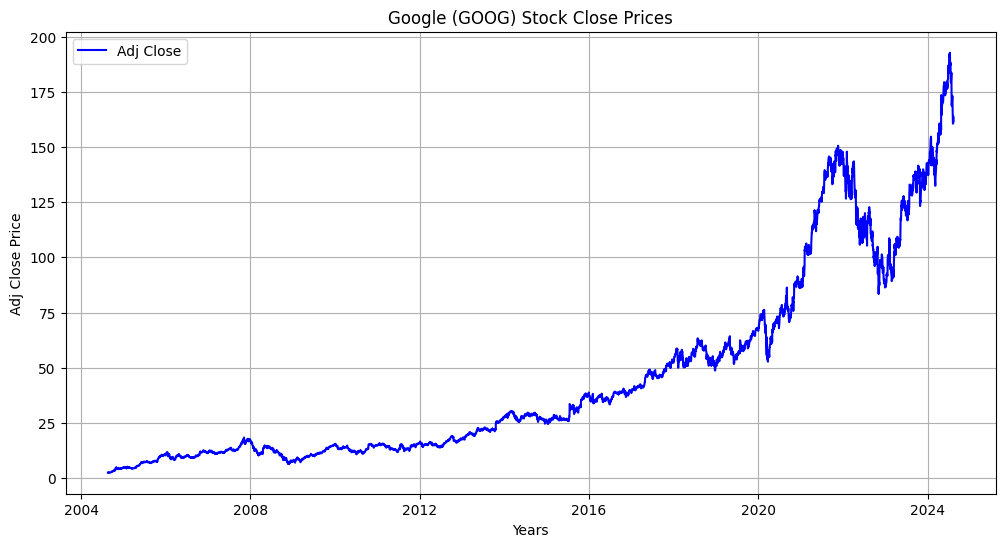

In [10]:
# plotting the "Adj Close" price
plt.figure(figsize=(12, 6))
plt.title("Google (GOOG) Stock Close Prices")
plt.plot(google_data['Adj Close'], label="Adj Close", color = "blue")
plt.xlabel("Years")
plt.ylabel("Adj Close Price")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Display the columns
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
# Define a function to plot a graph for a given column
def plot_google_graph(column, hue = "Adj Close"):
    # Create a new figure with specified size
    plt.figure(figsize=(12, 5))
    plt.title(f"Google (GOOG) Stock {column} Prices")
    # Plot the data for the specified column
    plt.plot(google_data[column], label=column, color="blue")
    plt.xlabel("Years")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

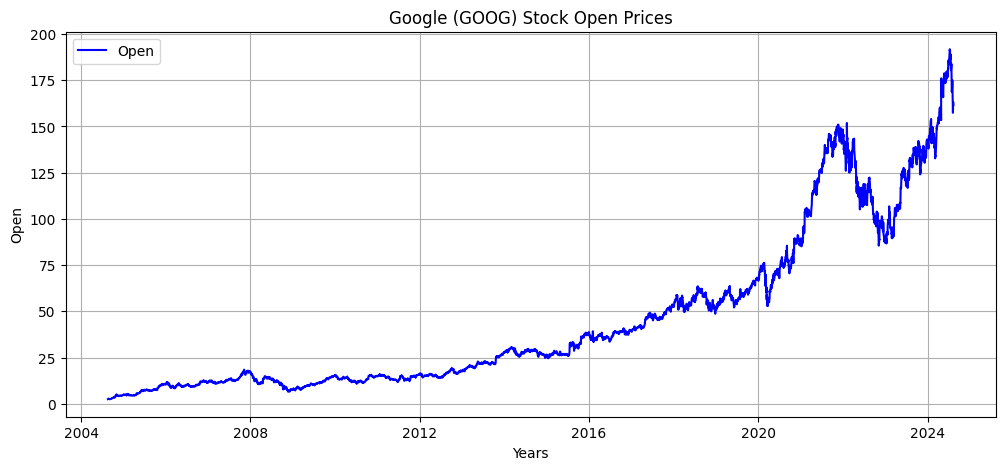

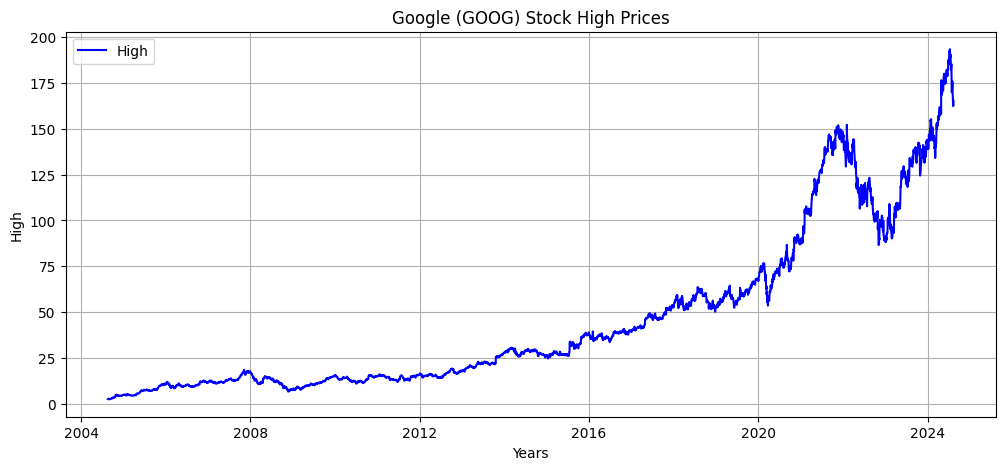

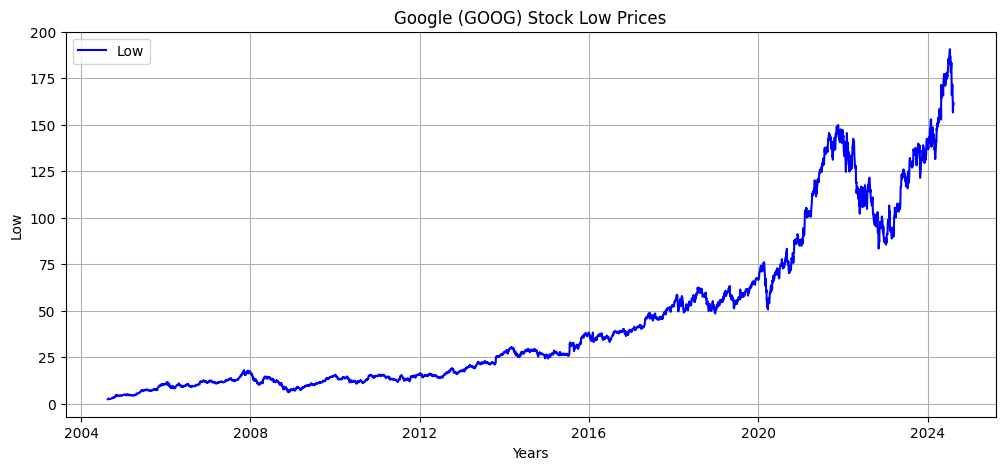

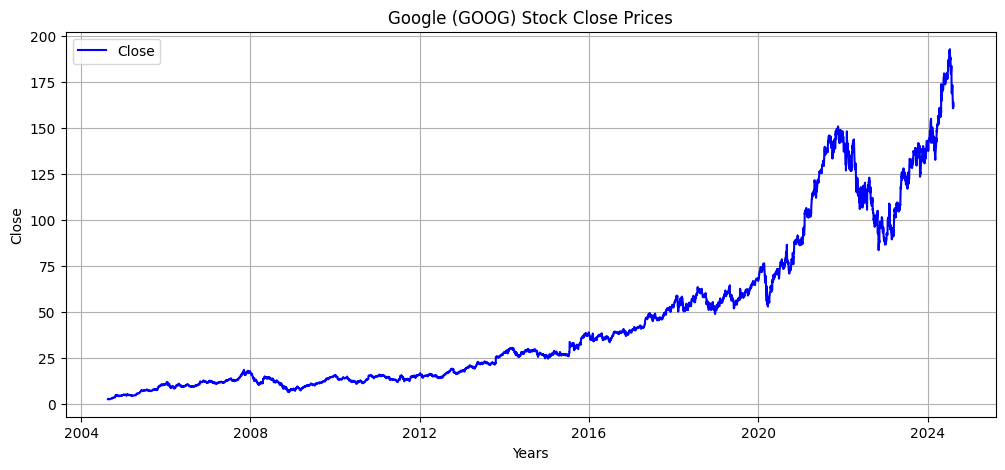

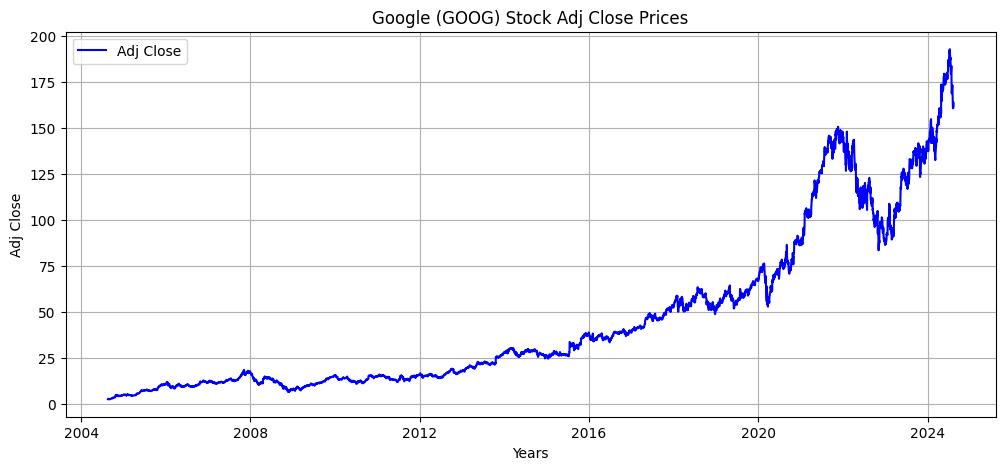

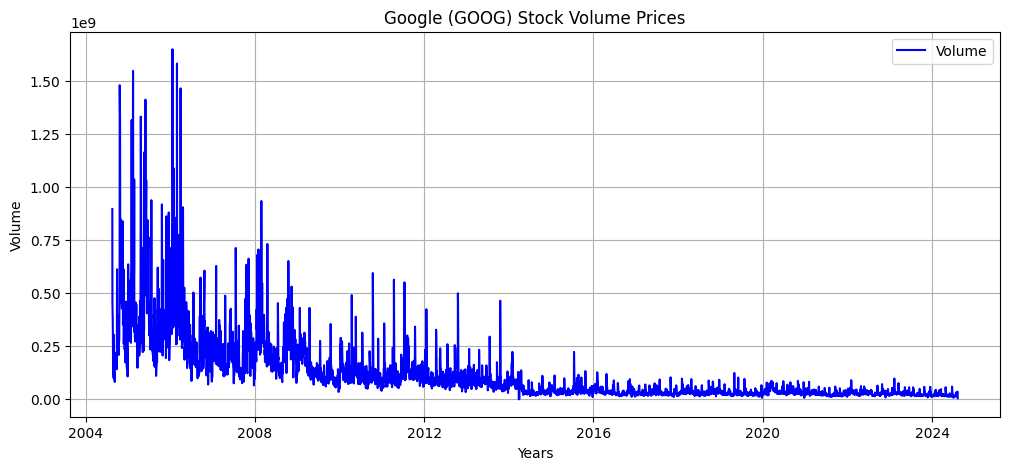

In [13]:
# Iterate through each column in the google_data DataFrame
for column in google_data.columns:
    # Call the function to plot the graph for the current column
    plot_google_graph(column)

### **Let's take an example of Moving Average in time series data**

**What is a Moving Average (MA) or Simple Moving Average (SMA)?**

A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.

It is particularly useful for smoothing out data to identify trends over time.

The SMA is calculated by taking the arithmetic mean of a given set of values over a specific number of periods.

     **Formula:**
          **Simple Moving Average (SMA) or (MA) = (p1 + p2 + p3 + ..... +pn) / n**


In [14]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# Moving_average for five days are: ===> null,null, null, null, 30, 40, 50, 60, 70, 80


# Define a list of data for 10 days
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Calculate and print the moving average for the first five days
print(f"Moving average for five days are: {sum(temp_data[0:5]) / 5}")

# Calculate and print the moving average for the second set of five days
print(f"Moving average for five days are: {sum(temp_data[1:6]) / 5}")

Moving average for five days are: 30.0
Moving average for five days are: 40.0


In [15]:
import pandas as pd

# Create a DataFrame from the temperature data
sample_data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Display the first few rows of the DataFrame
sample_data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [16]:
# Calculate the 5-day moving average for the data and add it as a new column
sample_data["Moving_average"] = sample_data.rolling(5).mean()

# Display the DataFrame with the new moving average column
sample_data

,0,Moving_average
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### **So, Lets implements in our projects :**

In [17]:
# Iterate over the last 20 years from the end date in the google_data DataFrame
for i in range(end.year - 20, end.year):
    # Print the year and the count of entries for that year in the google_data index
    print(i, list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [18]:
# Calculate 100-day moving average for the 'Adj Close' column
google_data["Moving_average_for_100_days"] = google_data["Adj Close"].rolling(100).mean()

# Print the last few values of the 100-day moving average to verify
print(google_data["Moving_average_for_100_days"][0:100].tail())

Date
2005-01-04         NaN
2005-01-05         NaN
2005-01-06         NaN
2005-01-07         NaN
2005-01-10    3.840593
Name: Moving_average_for_100_days, dtype: float64


In [19]:
# Define a function to plot a graph for given columns
def plot_google_graph1(columns):
    plt.figure(figsize=(12, 5))
    plt.title("Google (GOOG) Stock Prices")

    # Define a list of colors to use for different columns
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

    # Plot the data for each specified column
    for i, column in enumerate(columns):
        # Plot the data with a unique color
        plt.plot(google_data[column], label=column, color=colors[i % len(colors)])

    plt.xlabel("Years")
    plt.ylabel("Adj Close Stock Price")
    plt.legend()
    plt.grid()
    plt.show()

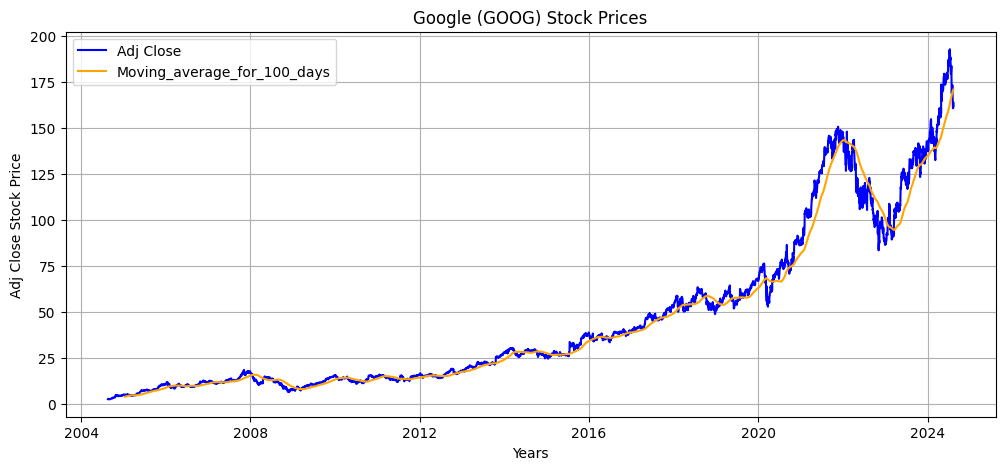

In [20]:
# Plot the 'Adj Close' column and its 100-day moving average
plot_google_graph1(["Adj Close", "Moving_average_for_100_days"])


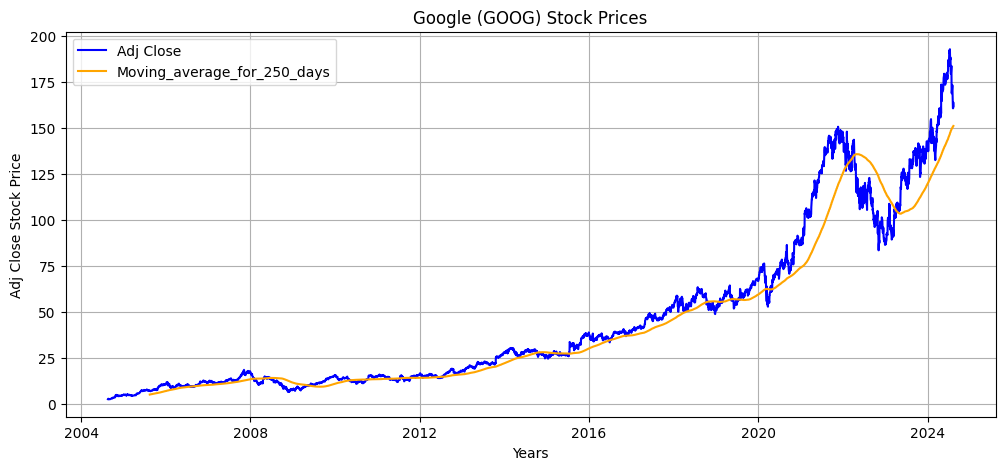

In [21]:
# Calculate 250-day moving average for the 'Adj Close' column
google_data['Moving_average_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

# Plot the 'Adj Close' column and its 250-day moving average
plot_google_graph1(["Adj Close", "Moving_average_for_250_days"])


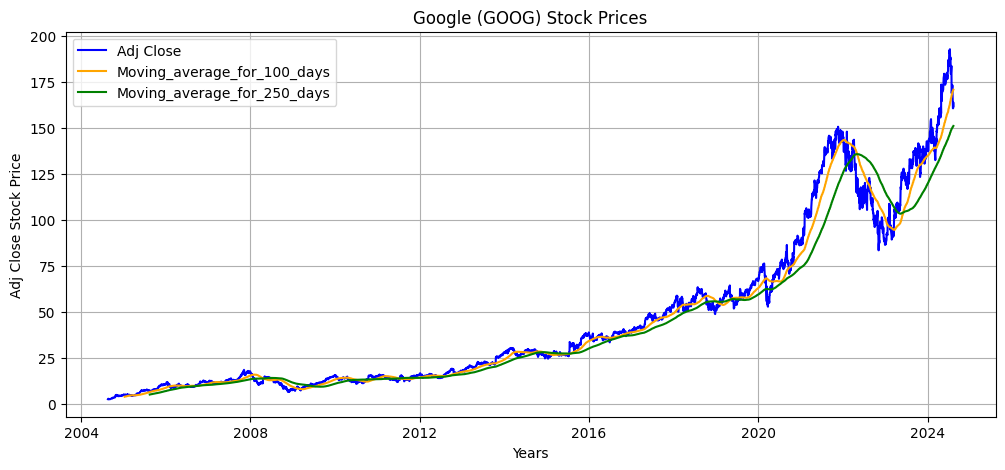

In [22]:
# Plot the 'Adj Close' column and both moving averages
plot_google_graph1(["Adj Close", "Moving_average_for_100_days", "Moving_average_for_250_days"])

In [23]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


### **Data Normalization:**

**Definition:** This is a specific technique within data preprocessing that adjusts the scale of the data to ensure it fits within a certain range, often [0, 1] or [-1, 1].

**Includes:** Techniques like min-max scaling, z-score standardization, and decimal scaling.

In [24]:
# Here we select the column "Adj Close" instead of "Close" because "Adj Close" column is more accurate than the "Close" column.
# ".reshape(-1, 1)" transforms the 1-dimensional array of closing prices into a 2-dimensional array with one column.

Adj_close_prices = google_data[['Adj Close']].values.reshape(-1, 1)
Adj_close_prices

array([[  2.49629235],
       [  2.69457269],
       [  2.72168994],
       ...,
       [160.75      ],
       [163.83999634],
       [161.66000366]])

In [25]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data using Min-Max Scaling
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_prices = scaler.fit_transform(Adj_close_prices)
scaled_prices

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [8.32204443e-01],
       [8.48452879e-01],
       [8.36989606e-01]])

In [26]:
# Calculate the length of the normalized_prices array
len(scaled_prices)

5028

### **Define the Sequence Length:**

In [27]:
# Create sequences of data
# Define the length of the sequences
sequence_length = 60

# Initialize empty lists to store the sequences and the corresponding target values
X_data = []
y_data = []


# Loop to create sequences of data and their corresponding target values
for i in range(sequence_length, len(scaled_prices)):
    # Append the sequence of 60 data points to X_data
    X_data.append(scaled_prices[i-sequence_length:i, 0])

    # Append the target value (the next data point) to y_data
    y_data.append(scaled_prices[i, 0])

# Convert the lists to numpy arrays for further processing
X_data, y_data = np.array(X_data), np.array(y_data)

# Reshape X_data to be suitable for input into LSTM (or similar) models
X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))

In [28]:
# Display the first sequence and its corresponding target value
X_data[0], y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

## **Step 4: Split Data into training and testing sets**

    ** *italicized text*Split the data into training and testing sets. The first 70% of the sequences and targets are assigned to the training set, and the remaining 30% are assigned to the testing set.**

In [29]:
# Calculate 70% of the length of X_data for splitting into training and testing sets
int(len(X_data) * 0.70)

3477

In [30]:
# Calculate the difference between the end of the data and the 70% training split point
5016 - 60 - int(len(X_data) * 0.7)

1479

In [31]:
# Split the data into training and testing sets

# Calculate the index at which to split the data
split = int(len(X_data) * 0.7)

# Assign the first 70% of X_data to x_train
X_train = X_data[:split]

# Assign the first 70% of y_data to y_train
y_train = y_data[:split]

# Assign the remaining 30% of X_data to X_test
X_test = X_data[split:]

# Assign the remaining 30% of y_data to y_test
y_test = y_data[split:]

In [32]:
# print the shape of the training data and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3477, 60, 1)
(3477,)
(1491, 60, 1)
(1491,)


## **Step 5: Build Simple RNN Model**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
import math

# Build the RNN model
model_rnn = Sequential()

# Layer 1: SimpleRNN
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dropout(0.2))

# Layer 2: SimpleRNN
model_rnn.add(SimpleRNN(units=50, return_sequences=False))
model_rnn.add(Dropout(0.2))

# Output layer
model_rnn.add(Dense(units=1))

# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - loss: 0.0082 - val_loss: 2.9405e-04
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 5.0572e-04 - val_loss: 1.2790e-04
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 3.8617e-04 - val_loss: 3.4460e-04
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 2.6381e-04 - val_loss: 2.6812e-04
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.8674e-04 - val_loss: 5.6740e-05
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.5607e-04 - val_loss: 1.2693e-04
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 1.3266e-04 - val_loss: 7.6749e-05
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 1.2122e-04 - val_loss: 6.4709e-05
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 9.8020e-05 - val_loss: 3.4933e-05
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 8.6280e-05 - val_loss: 3.3415e-05
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.6425e-05 -

In [34]:
# Make predictions with the RNN model
y_pred_train_rnn = model_rnn.predict(X_train)
y_pred_test_rnn = model_rnn.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_train_inverse_rnn = scaler.inverse_transform(y_pred_train_rnn)
y_pred_test_inverse_rnn = scaler.inverse_transform(y_pred_test_rnn)
y_train_inverse_rnn = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inverse_rnn = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for train and test data for RNN
train_rmse_rnn = math.sqrt(mean_squared_error(y_train_inverse_rnn, y_pred_train_inverse_rnn))
test_rmse_rnn = math.sqrt(mean_squared_error(y_test_inverse_rnn, y_pred_test_inverse_rnn))

print(f'RNN Train RMSE: {train_rmse_rnn}')
print(f'RNN Test RMSE: {test_rmse_rnn}')

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RNN Train RMSE: 0.4692450615756574
RNN Test RMSE: 5.89141862047676


In [38]:
# Calculate R^2 score for train and test data
train_r2 = r2_score(y_train_inverse_rnn, y_pred_train_inverse_rnn)
test_r2 = r2_score(y_test_inverse_rnn, y_pred_test_inverse_rnn)

print(f'Train R^2 Score: {train_r2}')
print(f'Test R^2 Score: {test_r2}')

Train R^2 Score: 0.9988537205885831
Test R^2 Score: 0.9728984242656675


## **Step 5: Build Stacked LSTM Model**

    **Explanation: Construct an LSTM-based neural network model with two LSTM layers and dropout for regularization.**


In [39]:
# Import necessary libraries for building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Initialize the LSTM model as a sequential model
model_lstm = Sequential()

# Add the first LSTM layer with 50 units and return sequences for stacking another LSTM layer
# The input shape is specified as the number of time steps (X_train.shape[1]) and 1 feature
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add a Dropout layer to reduce overfitting by randomly setting 20% of the inputs to zero during training
model_lstm.add(Dropout(0.2))

# Add the second LSTM layer with 50 units and set return_sequences to False as this is the last LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=False))

# Add another Dropout layer to further reduce overfitting
model_lstm.add(Dropout(0.2))

# Add the output layer with a single unit, as this is a regression problem predicting a single continuous value
model_lstm.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)




### **Compile the Models**

In [40]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# So, model.compile(optimizer='adam', loss='mean_squared_error') configures the model to use
# the Adam optimizer and Mean Squared Error loss function for training, aiming to minimize the
# error between the predicted and actual values.

## **Step 6: Train the Model**

    **Explanation: Train the model using the training data for a specified number of epochs, batch size and validation_split.**


In [41]:
# Train the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)  # Here we use 50 or more but now we use 5 epoch and batch size 1

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0011 - val_loss: 1.0360e-04
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 6.6397e-05 - val_loss: 5.5128e-05
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 5.2981e-05 - val_loss: 5.7199e-05
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - loss: 4.9520e-05 - val_loss: 4.6041e-05
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 4.1983e-05 - val_loss: 1.1838e-04
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 4.2454e-05 - val_loss: 5.1224e-05
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 3.2173e-05 - val_loss: 4.4367e-05
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 3.0381e-05 - val_loss: 4.2746e-05
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 2.8709e-05 - val_loss: 4.5463e-05
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 2.9091e-05 - val_loss: 5.2584e-05
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 2.5510

## **Step 7: Make Predictions**

    **Explanation: Make predictions on both the training and testing datasets.**

In [42]:
# Print a summary of the model's architecture
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [43]:
# Make predictions on the training data
y_pred_train = model_lstm.predict(X_train)

# Make predictions on the test data
y_pred_test = model_lstm.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


### **Inverse Transform Predictions:**

    **Explanation: Convert the predicted values back to the original scale using the inverse transform of the scaler.**

In [44]:
# Inverse transform of the predictions and actual values


# Inverse transform the training predictions back to original scale
y_pred_train_inverse = scaler.inverse_transform(y_pred_train)

# Inverse transform the test predictions back to original scale
y_pred_test_inverse = scaler.inverse_transform(y_pred_test)

# Inverse transform the actual training values back to original scale
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))

# Inverse transform the actual test values back to original scale
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

In [45]:
# Print the actual training and predicted training values
print(y_train_inverse)
print(y_pred_train_inverse)

# Print the actual testing and predicted testing values
print(y_test_inverse)
print(y_pred_test_inverse)

[[ 4.52785635]
 [ 4.59925747]
 [ 4.29250717]
 ...
 [60.84026718]
 [59.78197098]
 [59.25656891]]
[[ 4.698847]
 [ 4.74546 ]
 [ 4.814196]
 ...
 [61.89673 ]
 [61.82168 ]
 [61.397377]]
[[ 58.50542068]
 [ 58.1753006 ]
 [ 58.16580963]
 ...
 [160.75      ]
 [163.83999634]
 [161.66000366]]
[[ 60.803665]
 [ 60.101646]
 [ 59.429405]
 ...
 [166.23672 ]
 [164.08253 ]
 [163.2421  ]]


### **Root Mean Squared Error (RMSE):**

    **The Root Mean Squared Error (RMSE) is a commonly used metric to measure the accuracy of a model’s predictions.**

    **It represents the square root of the average of the squared differences between the predicted and actual values.**

In [46]:
# Calculate RMSE for train and test data
from sklearn.metrics import mean_squared_error, r2_score
import math

# Calculate RMSE for training data
train_rmse = math.sqrt(mean_squared_error(y_train_inverse, y_pred_train_inverse))
# Calculate RMSE for test data
test_rmse = math.sqrt(mean_squared_error(y_test_inverse, y_pred_test_inverse))

In [48]:
# Print the RMSE values
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.5993869285972544
Test RMSE: 2.759749759358643


**-  -   -  -  -  -  -> The RMSE (Root Mean Squared Error) for the LSTM model is lower compared to the Simple RNN model, indicating that the LSTM model has better performance and predictive accuracy. Therefore, based on the RMSE comparison, the LSTM model is more suitable for stock price prediction in this case.**

### **The full form of R² score is "Coefficient of Determination."**

- The R² score is a statistical measure that indicates how well the regression predictions approximate the real data points.
- It ranges from 0 to 1, where 1 indicates that the regression predictions perfectly fit the data. An R² score closer to 1 suggests a good fit for the model.

In [49]:
# Calculate R^2 score for train and test data
train_r2 = r2_score(y_train_inverse, y_pred_train_inverse)
test_r2 = r2_score(y_test_inverse, y_pred_test_inverse)

print(f'Train R^2 Score: {train_r2}')
print(f'Test R^2 Score: {test_r2}')

Train R^2 Score: 0.9981297244092447
Test R^2 Score: 0.9940530514055517


### **Adjust the date ranges**

In [50]:
# Adjust the date ranges for training and testing sets
dates = google_data.index
# The `dates_train` variable is set to include all dates up to the training split index plus the sequence length,
# ensuring that the dates align with the entire training period including the sequence length.
dates_train = dates[:split + sequence_length]

# The `dates_test` variable starts from the split index plus the sequence length to the end of the dataset,
# representing the dates for the testing period following the training period.
dates_test = dates[split + sequence_length:]


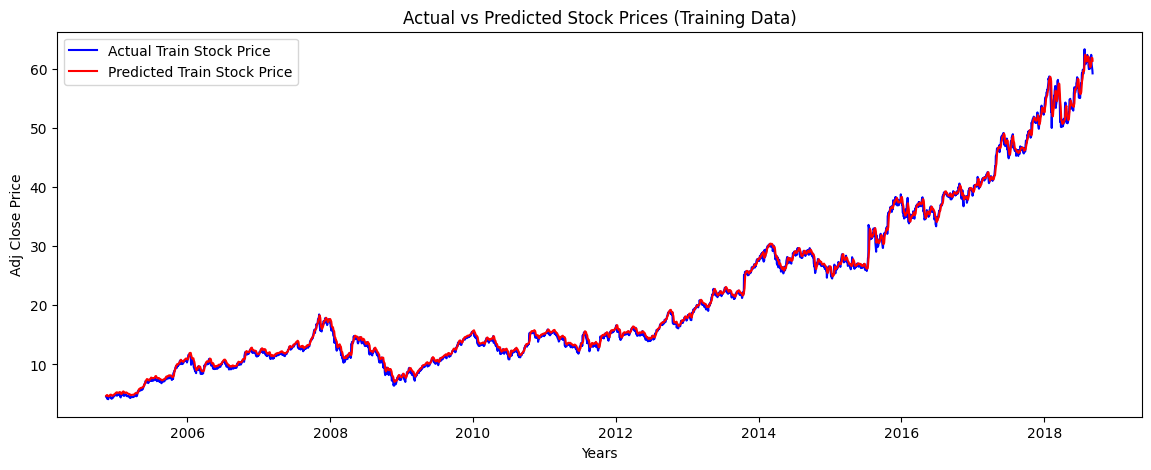

In [51]:
# Plot graph of actual vs. predicted stock prices for the training data

# Plot graph of original y_train_inverse data and y_train_pred_inverse data
plt.figure(figsize=(14, 5))
plt.plot(dates_train[sequence_length:], y_train_inverse, color='blue', label='Actual Train Stock Price')
plt.plot(dates_train[sequence_length:], y_pred_train_inverse, color='red', label='Predicted Train Stock Price')
plt.title('Actual vs Predicted Stock Prices (Training Data)')
plt.xlabel('Years')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


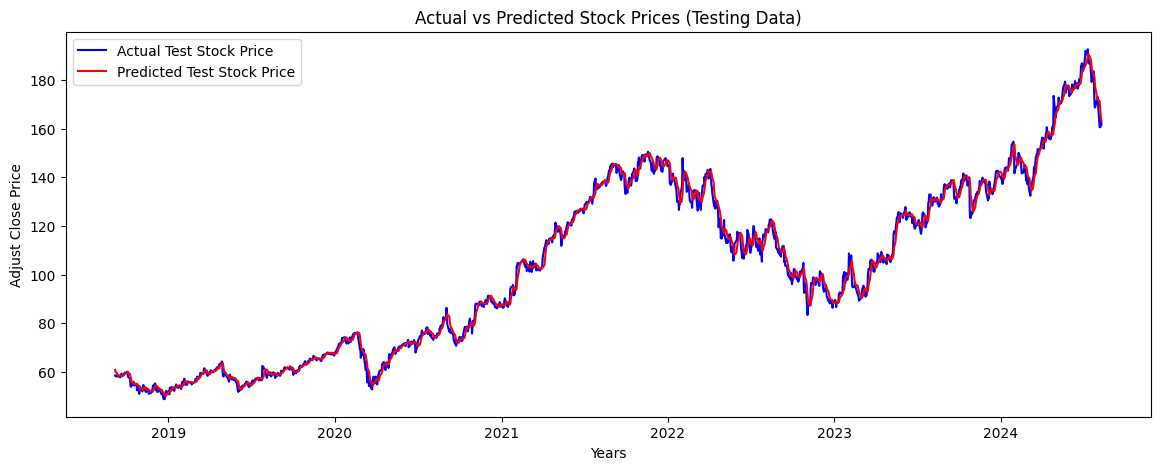

In [52]:
# Plot graph of actual vs. predicted stock prices for the testing data

# Plot graph of original y_test_inverse data and y_test_pred_inverse data
plt.figure(figsize=(14, 5))
plt.plot(dates_test, y_test_inverse, color='blue', label='Actual Test Stock Price')
plt.plot(dates_test, y_pred_test_inverse, color='red', label='Predicted Test Stock Price')
plt.title('Actual vs Predicted Stock Prices (Testing Data)')
plt.xlabel('Years')
plt.ylabel('Adjust Close Price')
plt.legend()
plt.show()

In [53]:
# Prepare training predictions
train_predict_plot = np.empty_like(Adj_close_prices)
train_predict_plot[:, :] = np.nan
train_predict_plot[sequence_length:split + sequence_length] = y_pred_train_inverse

# Prepare test predictions
test_predict_plot = np.empty_like(Adj_close_prices)
test_predict_plot[:, :] = np.nan
test_predict_plot[split + sequence_length:] = y_pred_test_inverse

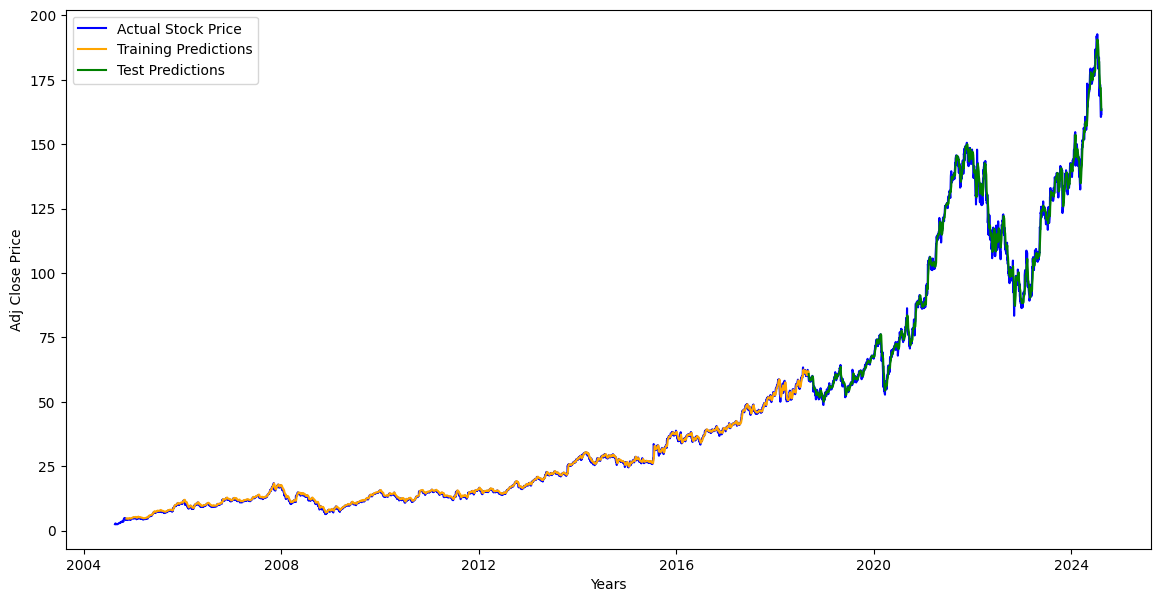

In [54]:
# Prepare data for comprehensive plot
plt.figure(figsize=(14, 7))

# Plot the actual stock prices
plt.plot(dates, Adj_close_prices, color='blue', label='Actual Stock Price')

# Plot training and testing predictions
plt.plot(dates, train_predict_plot, color='orange', label='Training Predictions')
plt.plot(dates, test_predict_plot, color='green', label='Test Predictions')

plt.xlabel('Years')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

## **Step 8: Make predictions for Future 20 days**

In [55]:
# Create empty future predictions list for 20 days
future_predictions = []

# Get the last sequence from the scaled prices
last_sequences = scaled_prices[-sequence_length:]

# Generate predictions for the next 20 days
for _ in range(20):
    next_scaled_prices = model_lstm.predict(last_sequences.reshape(1, sequence_length, 1))[0, 0]
    future_predictions.append(next_scaled_prices)
    # Update the last_sequences with the new predicted price
    last_sequences = np.append(last_sequences[1:], next_scaled_prices)

# Inverse transform the predicted prices to get the actual price values
# To convert the scaled data back to its original scale.
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


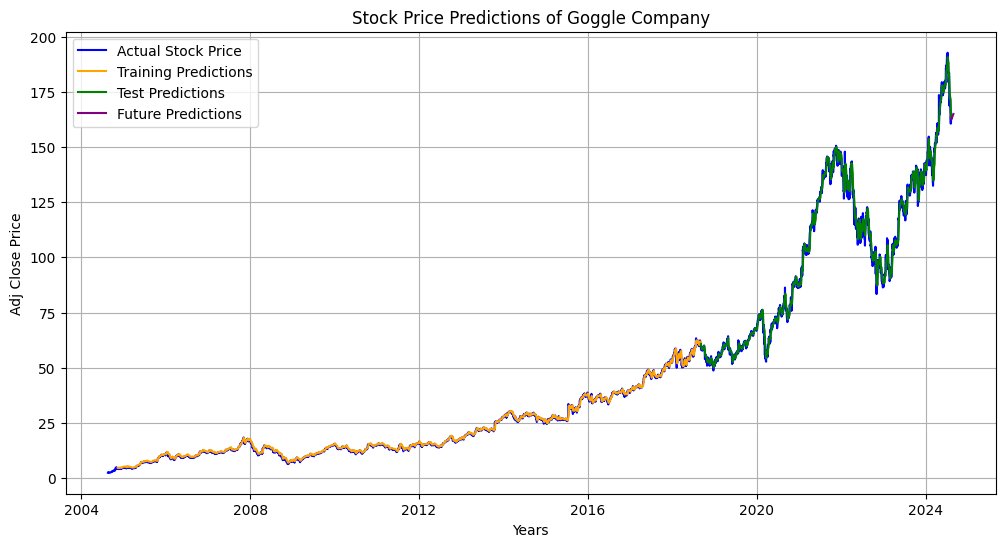

In [56]:
# Create a date range for future predictions
future_dates = pd.date_range(start=dates[-1], periods=20 + 1, inclusive='right')

# Plot future predictions
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot actual stock prices
plt.plot(dates, Adj_close_prices, color='blue', label='Actual Stock Price')

# Plot training predictions
plt.plot(dates, train_predict_plot, color='orange', label='Training Predictions')

# Plot testing predictions
plt.plot(dates, test_predict_plot, color='green', label='Test Predictions')

# Plot future predictions
plt.plot(future_dates, future_predictions, color='purple', label='Future Predictions')

plt.title('Stock Price Predictions of Goggle Company')
plt.xlabel('Years')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid()
plt.show()

### **Save the model**

In [61]:
# Save the RNN model
# model_rnn.save('/content/drive/MyDrive/Deep Learning (Personal)/Stock Market Pridictions/rnn_model.h5')

# Save the LSTM model
model_lstm.save('/content/drive/MyDrive/Deep Learning (Personal)/Stock Market Pridictions/lstm_model.h5')


## **Step 9: Make a Web Application using Gradio Library**
    **Gradio is a Python library that allows users to quickly create interactive web interfaces for machine learning models and data science applications. It simplifies the process of building, sharing, and deploying demos with minimal code, supporting various input and output components and integrating seamlessly with popular ML libraries.**

In [57]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [62]:
import gradio as gr
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the saved model from a specified path.
model = load_model("/content/drive/MyDrive/Deep Learning (Personal)/Stock Market Pridictions/lstm_model.h5")

# Define a function to predict stock prices.
def predict_stock_prices(ticker, days):
    # Define the start and end dates for fetching historical stock data.
    # end = datetime.now()  # Current date and time.
    start = datetime(end.year - 20, end.month, end.day)  # Start date is 20 years prior to the current date.

    # Fetch historical stock data for the given ticker.
    data = yf.download(ticker, start, end=pd.Timestamp.today().strftime("%Y-%m-%d"))
    adj_close_prices = data['Adj Close'].values.reshape(-1, 1)

    # Normalize the stock price data.
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(adj_close_prices)

    # Create sequences for LSTM model input.
    sequence_length = 60
    last_sequence = scaled_prices[-sequence_length:]

    # Predict future stock prices.
    # Initialize a list to store future predictions.
    future_predictions = []
    for _ in range(days):
        next_price_scaled = model.predict(last_sequence.reshape(1, sequence_length, 1))[0, 0]
        future_predictions.append(next_price_scaled)
        last_sequence = np.append(last_sequence[1:], next_price_scaled)

    # Reverse the scaling of the predicted prices.
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Create a date range for the future predictions.
    future_dates = pd.date_range(start=data.index[-1], periods=days + 1, inclusive='right')

    # Prepare the result DataFrame with predicted prices and dates.
    result = pd.DataFrame({
        'Date': future_dates,
        'Predicted Prices': future_predictions.flatten()
    })

    # Plot the results.
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, adj_close_prices, color='blue', label='Actual Stock Price')
    plt.plot(result['Date'], result['Predicted Prices'], color='purple', label='Future Predictions')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.title(f'{ticker} Stock Price Prediction')
    plt.grid(True)

    # Save the plot to a file.
    plt.savefig('stock_prediction.png')  # Save the plot as 'stock_prediction.png'.

    # Return the DataFrame and path to the saved plot image.
    return result, 'stock_prediction.png'

# Create the Gradio interface.
interface = gr.Interface(
    fn=predict_stock_prices,  # Function to be called by the Gradio interface.
    inputs=[
        # Input for stock ticker symbol.
        gr.components.Textbox(label="Stock Ticker"),

        # Slider for selecting number of days to predict.
        gr.components.Slider(minimum=1, maximum=50, step=1, value=20, label="Days to Predict")
    ],
    outputs=[
        # Output for the predicted stock prices DataFrame.
        gr.components.Dataframe(label="Predicted Stock Prices"),

        # Output for the plot image file.
        gr.components.Image(type="filepath", label="Stock Price Prediction Plot")
    ],
     # Title of the Gradio app.
    title="Stock Market Prediction",
    description="Predict future stock prices using LSTM model. Enter a stock ticker and select the number of days to predict."
)

# Launch the Gradio app.
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9454875ad5d600afb9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


============> This web application allows users to predict future stock prices using a pre-trained **Long Short-Term Memory (LSTM) model.**

============> Users can input a stock ticker symbol (e.g., "GOOGL" for Google) and select the number of days (up to 50) for which they want to predict future prices.

============> The application fetches historical stock data from Yahoo Finance, preprocesses it by normalizing the prices, and creates sequences for the LSTM model to predict future prices.

============> The predicted prices are then converted back to their original scale and presented in both a table and a graph.

**The user interface, created with Gradio, includes:**
- A text box for entering the stock ticker symbol.
- A slider for selecting the number of days to predict.

The application displays the predicted stock prices and a plot comparing actual historical prices with future predictions, providing an easy-to-use tool for visualizing stock trends.

## **Conclusion:**

- This project successfully demonstrates the use of LSTM networks for predicting stock prices.
- The LSTM model outperformed SimpleRNN, showing lower RMSE values and better capturing stock price trends.
- The Gradio-based web application provides a user-friendly interface, allowing users to input any stock ticker and select a prediction period of up to 50 days.
- This project highlights the practical application of deep learning in finance, offering a valuable tool for stock market analysis and future price prediction.